In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as matplotlib
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
import seaborn
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn import tree
import warnings
import pickle
import xlrd

In [2]:
df= pd.read_excel('ponsel.xlsx')
df.head()

,Merk,Series,Memori,RAM,Harga
0,Lenovo,K6 Note,32 GB,3 GB,1500000
1,Samsung,Galaxy J8,64 GB,4 GB,3149000
2,OPPO,A35,16 GB,2 GB,2000000
3,Sony,Xperia ZR C5503,16 GB,2 GB,1650000
4,Nokia,6.1 Plus,64 GB,6 GB,2899000


In [3]:
df.describe()

,Harga
count,1.013000e+03
mean,3.186133e+06
std,3.511478e+06
min,6.490000e+05
25%,1.250000e+06
50%,1.899000e+06
75%,3.699000e+06
max,3.499900e+07


In [4]:
def _get_category_mapping(column):
    """ Return the mapping of a category """
    return dict([(cat, code) for code, cat in enumerate(column.cat.categories)])
df['Merk'] = df['Merk'].astype('category')
merk= _get_category_mapping(df['Merk'])
df['Merk'] = df['Merk'].cat.codes

df['Series'] = df['Series'].astype('category')
series = _get_category_mapping(df['Series'])
df['Series'] = df['Series'].cat.codes

df['Memori'] = df['Memori'].astype('category')
memori = _get_category_mapping(df['Memori'])
df['Memori'] = df['Memori'].cat.codes

df['RAM'] = df['RAM'].astype('category')
ram = _get_category_mapping(df['RAM'])
df['RAM'] = df['RAM'].cat.codes

In [5]:
#Save Variabel kategorik
import joblib

def _save_variable(variable, filename):
    """ Save a variable to a file """
    joblib.dump(variable, filename)
_save_variable(merk, 'Merk.pkl')
_save_variable(series, 'Series.pkl')
_save_variable(ram, 'RAM.pkl')
_save_variable(memori, 'Memori.pkl')

In [6]:
X = df.iloc[:, 0:4].values
y= df.iloc[:, 4]

In [7]:
# Menjadi dataset ke dalam Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

Text(0.5, 1.0, 'Feature Importances')

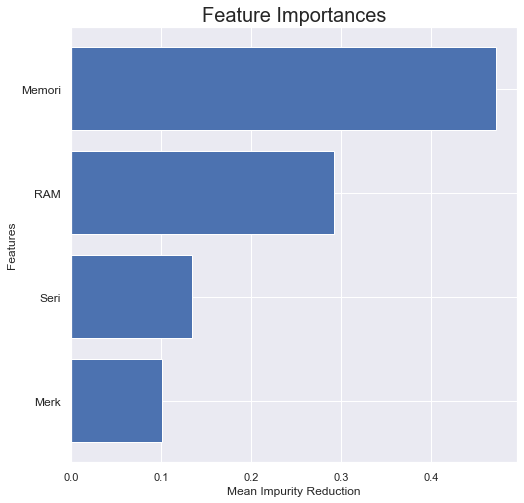

In [152]:
tree_feature =  pd.Series(model.feature_importances_, FEATURES).sort_values(ascending = True)
plt.figure(figsize = (8,8))
plt.barh(FEATURES, tree_feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature Importances', fontsize = 20)

In [8]:
rf = RandomForestRegressor(n_estimators=300, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [148]:
_save_variable(model, 'RFR.mdl')

In [35]:
FEATURES = [
    'Merk',
    'Seri',
    'RAM',
    'Memori',
]
TARGET = 'Harga'
#Variabel importance
features_importance = rf.feature_importances_
 
print("Feature ranking:")
for i, data_class in enumerate(FEATURES):
    print("{}. {} ({})".format(i + 1, data_class, features_importance[i]))

Feature ranking:
1. Merk (0.10164137023513618)
2. Seri (0.47181835650017206)
3. RAM (0.13429404771472675)
4. Memori (0.292246225549965)


In [9]:
prediksi = rf.predict(X_test)

In [10]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediksi))

Mean Squared Error: 915942032838.7771


In [11]:
r2_score(y_test, prediksi)

0.8615337442186137

In [12]:
# Score model
rf.score(X_train, y_train)

0.9579340632197973

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediksi))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediksi))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediksi)))

Mean Absolute Error: 619123.4686041084
Mean Squared Error: 915942032838.7771
Root Mean Squared Error: 957048.6052645274


In [14]:
print('MAE:\t$%.2f' % mean_absolute_error(y_test, prediksi))
print('MSLE:\t%.5f' % mean_squared_log_error(y_test, prediksi))

MAE:	$619123.47
MSLE:	0.13854


In [15]:
df1 = pd.DataFrame ({'Real Values': y_test, 'Predicted Values': prediksi}) 
df1

,Real Values,Predicted Values
689,999000,8.590869e+05
518,2048000,2.805973e+06
940,1368800,2.150501e+06
96,1980000,1.885706e+06
578,1290000,3.089631e+06
...,...,...
215,5499000,4.478514e+06
440,8949000,7.447289e+06
816,1799000,1.619567e+06
912,1799000,1.893651e+06


In [16]:
df1.describe()

,Real Values,Predicted Values
count,1.020000e+02,1.020000e+02
mean,2.531568e+06,2.751136e+06
std,2.584648e+06,2.745761e+06
min,6.750000e+05,7.519727e+05
25%,1.099250e+06,1.375781e+06
50%,1.767000e+06,1.802427e+06
75%,2.974250e+06,2.794507e+06
max,1.733000e+07,1.875140e+07


In [19]:
def simple_scatter_plot(y_test, prediksi, output_filename, title_name, x_axis_label, y_axis_label):
    """Simple scatter plot.
 
    Args:
        x_data (list): List with x-axis data.
        y_data (list): List with y-axis data.
        output_filename (str): Path to output image in PNG format.
        title_name (int): Plot title.
        x_axis_label (str): X-axis Label.
        y_axis_label (str): Y-axis Label.
 
    """
    seaborn.set(color_codes=True)
    matplotlib.figure(1, figsize=(9, 6))
 
    matplotlib.title(title_name)
 
    ax = seaborn.scatterplot(x=y_test, y=prediksi)
 
    ax.set(xlabel=x_axis_label, ylabel=y_axis_label)
 
    matplotlib.savefig(output_filename, bbox_inches='tight', dpi=300)
    matplotlib.close()

In [20]:
# find the correlation between real answer and prediction
correlation = round(pearsonr(prediksi, y_test)[0], 5)
 
output_filename = "rf_regression.png"
title_name = "Random Forest Regression - Real Ponsel Price vs Predicted Ponsel Price - correlation ({})".format(correlation)
x_axis_label = "Real Ponsel Price"
y_axis_label = "Predicted Ponsel Price"
# plot data
simple_scatter_plot(y_test, prediksi, output_filename, title_name, x_axis_label, y_axis_label)

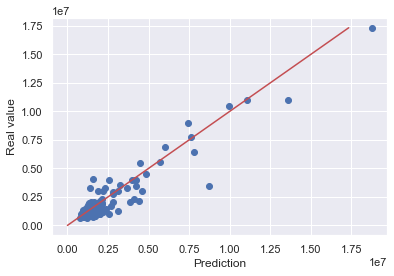

In [21]:
# Build a plot
plt.scatter(prediksi, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [22]:
# Pull out one tree from the forest
tree = rf.estimators_[4]

In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names =None, 
                rounded = True, precision = 1)

In [25]:
import pydot

In [26]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [27]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [28]:
# Write graph to a png file
graph.write_png('tree.png')

In [29]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=300, max_depth = 4)
rf_small.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=300)

In [30]:
# Extract the small tree
tree_small = rf_small.estimators_[5]

In [31]:
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = None, rounded = True, precision = 1)

In [32]:
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

In [33]:
graph.write_png('small_tree3.png')

In [34]:
# make a single prediction
row = [[4,8,2,5]]
yhat = rf_small.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 2346431
